# Introduction

This notebook is going to serve as a sort of playground to mess around with an mp3 file using librosa. An objective to keep in mind is doing a Fourier analysis on the waveform to extract the individual frequencies in the song.

## Setup

First things first, got to import all the necessary packages and then load in the song using librosa. 

In [1]:
%matplotlib inline

import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
import numpy as np
import pandas as pd
from math import sqrt

AUDIO_DIR = './data'

In [2]:
filename = AUDIO_DIR + '/07 - Honeybaby.mp3'
print('File: {}'.format(filename))

x, sr = librosa.load(filename, sr=None, mono=True)
print('Duration: {:.2f}s, {} samples'.format(x.shape[-1] / sr, x.size))

start, end = 7, 17
ipd.Audio(data=x, rate=sr)

File: ./data/07 - Honeybaby.mp3


/Users/tejassiripurapu/Library/Python/3.7/lib/python/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


Duration: 46.04s, 2030356 samples


## Understanding the Waveform

A sound, like many types of signals, can be represented as a wave. The raw sound wave itself can best be illustrated as a continuous function of intensity (or amplitude) over a certain length of time. For several reasons it's impractical to store the sound wave in its raw continuous form. Analog to digital converters require the track be sampled, meaning it's reduced to a discrete form and "slices" of the wave are taken over specified time intervals. Therefore, unless the track is in analog form it is always going to be represented as a set of discrete values over a length of time rather than a continuous sinusoid.

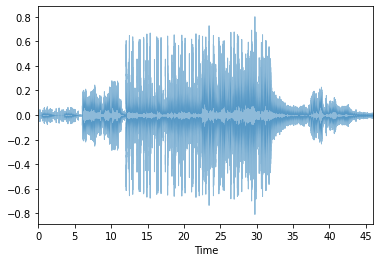

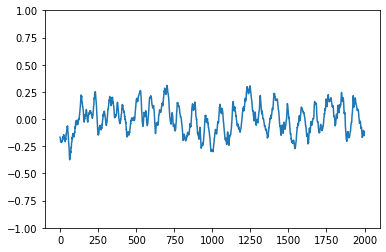

In [3]:
librosa.display.waveplot(x, sr, alpha=0.5)
start = len(x) // 2
plt.figure()
plt.plot(x[start:start+2000])
plt.ylim((-1, 1));

# Concepts

## Fourier Series

The Fourier Series is akin to the Taylor series approximations for power series applied to periodic functions. It's a way of representing or approximating periodic functions as the sum of a constant and a potentially infinite number of sinusoids.

## Fourier Transform

The Fourier Transform is a mathematical machine which takes as input a signal in the time domain and transforms it into the frequency domain. Put another way, it's a way of extracting the constituent frequencies (or pitches) from the original complex waveform which represents the signal (in our case the song). While Fourier Series' are applied specifically to periodic functions over an infinitely large domain, Fourier Transforms are applied to non-periodic functions typically over a fixed length of time. 

## Discrete Fourier Transform (DFT)

Due to the digital nature of our signal, discrete samples over time, we can't directly apply the Fourier Transform equation. Fortunately, there is a version of Fourier Transform as applied to discrete time intervals known as the [Discrete Fourier Transform](https://en.wikipedia.org/wiki/Discrete_Fourier_transform). We will also implement the DFT using Fast Fourier Transform (FFT), specifically the Cooley-Tukey algorithm, in order to get a much faster runtime.

# Applying the Concepts

Let's take a look at the array `x` which contains the amplitudes corresponding to each sample.

In [4]:
print(x)

[0.00022888 0.00036621 0.00041199 ... 0.00811768 0.00889587 0.00819397]


## DFT Implementation

The input into our DFT function should be an array of amplitudes corresponding to each sample and the sample rate. We need the sample rate to compute the range of frequencies we are recording. This is defined as $[0, \frac{\text{sample rate}}{2}]$ by the Nyquist limit.

For every frequency we need to measure the magnitude and then plot to see which frequencies occur the most. Let's first try and implement a DFT trivially to extract the underlying frequencies and their magnitudes for a sample waveform. Then, we're going to implement the Fast Fourier Transform (FFT) algorithm which performs in $O(N \log(N))$ time versus $O(N^2)$ in order to extract frequencies from the song.

In [6]:
def dft(sample_rate, amplitudes): # takes as input the sample rate and the amplitude values of each sample
                                  # outputs the magnitude of each frequency
    max_freq = sample_rate // 2
    num_samples = len(amplitudes)
    mags = np.zeros(max_freq)
    for freq in range(max_freq):
        temp = 0
        for n in range(num_samples):
            x_n = amplitudes[n]
            z = 1j
            temp += x_n * np.exp(-(2*np.pi*n*freq*z) / num_samples)
        mags[freq] = sqrt(np.real(temp)**2 + np.imag(temp)**2)
    return mags

Let's create a sample waveform which is made up of sine waves. We'll create a couple sine functions of different frequencies, take 1000 samples from them, and sum them up to get our sample wave. This will serve as a sanity check for our above DFT function, as passing in the sample amplitudes and the sample rate (1000) should give an array of magnitudes which is zero everywhere except at the frequency bins corresponding to the frequencies of the sine functions we put into the wave.

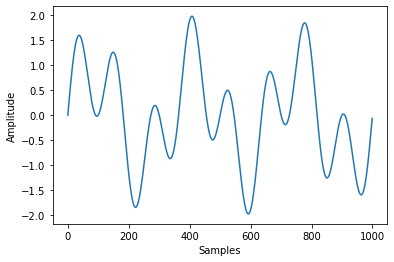

In [7]:
num_samples = 1000
test_x = np.arange(num_samples) # We're only going to model 1 sec, so num_samples == sample_rate
frequency_1 = 3
test_amplitudes_f1 = np.sin(2*np.pi*frequency_1 * (test_x / num_samples))
frequency_2 = 8
test_amplitudes_f2 = np.sin(2*np.pi*frequency_2 * (test_x / num_samples))
test_amplitudes = test_amplitudes_f1 + test_amplitudes_f2
plt.figure()
plt.plot(test_x, test_amplitudes)
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.show()

In [8]:
test_mags = dft(num_samples, test_amplitudes)

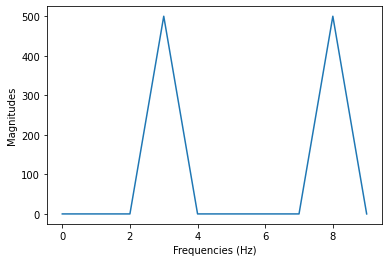

In [12]:
plt.figure()
plt.plot(np.arange(10), test_mags[:10])
plt.xlabel("Frequencies (Hz)")
plt.ylabel("Magnitudes")
plt.show()

It works! My sanity check passed and I am indeed sane. It seems as though the DFT function as defined above is able to take as an input the sample rate and an array of amplitudes for each sample and then output an array which contains the magnitudes of every frequency in $[0, \frac{\text{sample rate}}{2}]$. We exclude all frequencies above $\frac{\text{sample rate}}{2}$ because of the Nyquist limit ... (EXPLAIN)

## Fast Fourier Transform: Cooley-Tukey Algorithm

So we've successfully implemented the Discrete Fourier Transform as a way of extracting the constituent frequencies and their magnitudes from a songs waveform. But our current implementation is ridiculously slow (30+ minutes for one track!), especially for a track made up of over 2 million samples.

The current implementation has a runtime of $O(N^2)$. Fortunately, there exists an [algorithm](https://en.wikipedia.org/wiki/Cooley%E2%80%93Tukey_FFT_algorithm#The_radix-2_DIT_case) which leverages recursion to divide the DFT problem into smaller subproblems giving a faster runtime of $O(N \log(N))$. Essentially, we take the DFT implementation, apply it to the even-indexed amplitudes and the odd-indexed amplitudes separately, then combine into the resulting magnitude array.

In [10]:
def fft()

SyntaxError: invalid syntax (<ipython-input-10-5782827d7abb>, line 1)